# Lecture 4 Python Practice (Decision Trees)

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn

import warnings
warnings.filterwarnings("ignore")

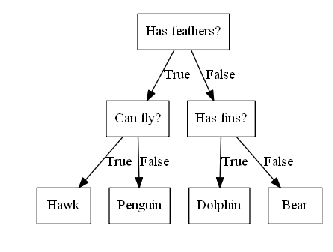

In [2]:
mglearn.plots.plot_animal_tree()

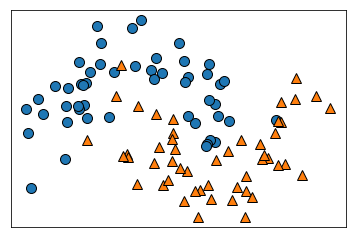

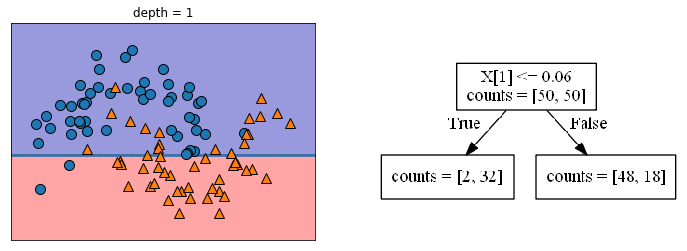

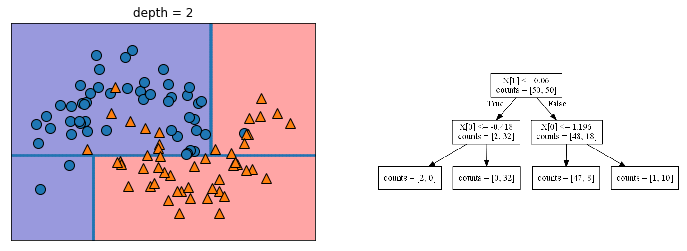

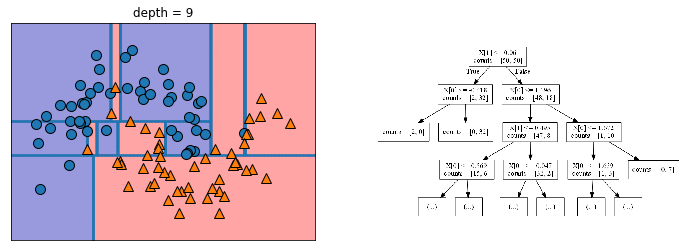

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

# criterion: the function to measure the quality of a split. Default: "gini". change to "entropy"
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_leaf_nodes

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [6]:
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))

{'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.9090909090909091


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

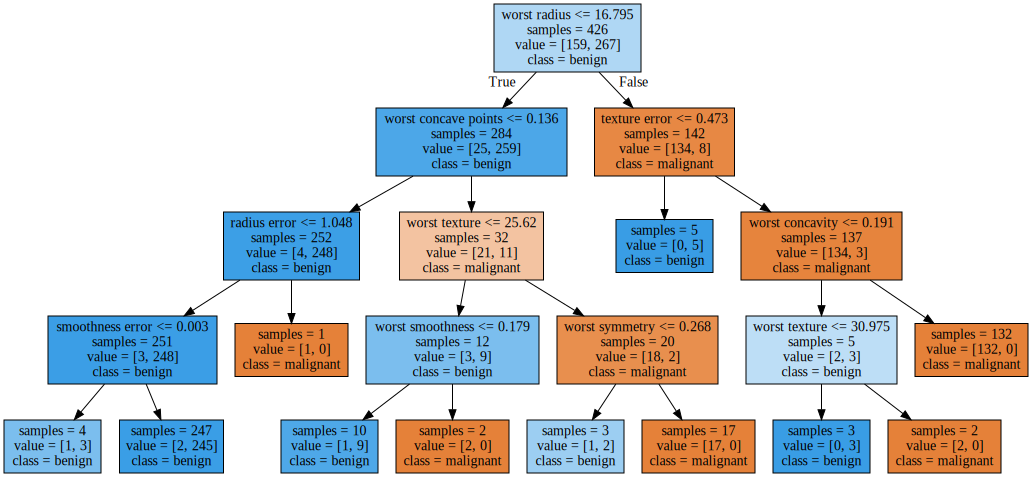

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [9]:
print("Feature importances:")
print(tree.feature_importances_)

# The importance of a feature is computed as the (normalized) 
# total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


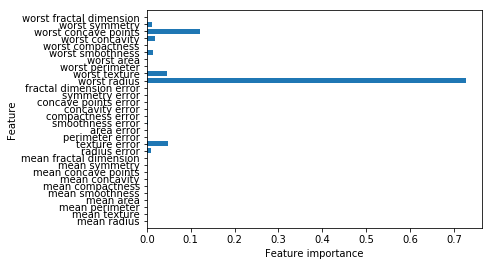

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [11]:
# load the data setdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAewAAAEKCAYAAADQN2b/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsnXm4ndPZ/z/fhBoSoki9eGnUWEOEHNQcQ71t1VQ0bU0ppfRVpUVnTelgaEtpVfESU0uNNZREyWTMQAZTaUmr+BmKEDO5f3/c9855zs6eTs6wz8m5P9e1rzx7PWt6nuOy9lrr/q6vzIwkSZIkSXo2/ZrdgSRJkiRJ6pMDdpIkSZL0AnLATpIkSZJeQA7YSZIkSdILyAE7SZIkSXoBOWAnSZIkSS8gB+wkSZIk6QXkgJ0kSZIkvYAcsJMkSZKkF7BEszuQLD6svPLKNmTIkGZ3I0mSpFcxffr0l8xscL18OWAnncaQIUOYNm1as7uRJEnSq5D0z0by5ZJ4kiRJkvQCcsBOkiRJkl5Arx2wJe0tacMq9wZLul/Sg5K272A7QyR9qcF8DzWQb4yk/eL6wmrP0JVIOlLSwd3dbpIkSbLo9PgBW1L/Krf2BqoNdrsAj5nZZmY2ucH6qjEEqDtgLwpm9hUze6Qr6q7T7nlmdml3t5skSZIsOl02YEs6UdIxcX2mpDvjehdJl8f1FyXNlvSQpNMKZedJOlnS/cDWkk6V9IikWZJ+IWkbYE/gDEkzJK1dKDsMOB34TNxbpkJ9J0maGu2eL0lRdh1Jf5U0U9IDUe+pwPZR13Exk54c9x+IvtR6D5L0m+j/LcBHCvcmSGopPPNpkqZHH7aM+09K2jPy9Jd0RvR9lqSvRvqIyHuNpMckXVF4pjbvLtJGSzq+9L4k3Rf3r5f04ULfTpM0RdLjHV2pSJIkSTqImXXJB/gEcHVcTwamAEsCPwK+CqwG/AsYjEer3wnsHfkN+Hxcrwj8DVB8XyH+HQPsV6XtUcBvCt8X1Feqs3B9GbBHXN8P7BPXSwPLAiOAmwv5lwWWjut1gWlxPQR4qEJfPgfcDvSPZ3611G9gAtBS6OOn4/p6YFy8r02BGZF+BPCDuF4KmAasFX2cC/w3/iPsXmC7Gu9uNHB8XM8Cdozrk4GzCn37ZVx/BvhrlXd9RPRj2pprrmlJkiRJ+yiNI/U+XbkkPh0YLmk54J0YRFqA7fEBfAtggpm9aGbvA1cAO0TZD4Br4/o14G3gQkmfA95chL4U6wPYKfa4ZwM7AxtFP1c3s+sBzOxtM6vU1pLABVH2aqovy5fYAfijmX1gZs/iP0wq8S5wW1zPBiaa2XtxPSTSdwMOljQD/3GxEv6jAWCKmf3bzOYDM6JMzXcnaRA+iE+MpEto/RsAXBf/Ti/0oQ1mdr6ZtZhZy+DBdWWESZIkySLSZQN2DDZzgC8D9+CD9E7A2sCjgGoUf9vMPoh63ge2xAfcvWkd1NrDgvokLQ2ci89yNwEuwGfTtfpT5DjgeXzm2wJ8qIEy1kCe9+KXFsB8/EcOMQCX9PICvm5mw+KzlpmNi3vvFOr6AFiiE95dqc4PSM1+kiRJU+nqoLNJwPHx72TgSHx51/AZ4o6SVo5AsC8CE8srkDQQGGRmfwGOBYbFrdeB5RahT0vHvy9F3fsBmNlrwL8l7R3tLiVp2QrtDAKei4H0IHypuxaTgC/E/vOq+I+WRWUscJSkJaOP60kaUC1zjXcHgJnNBV4p7E8fRIW/QZIkSdJ8unrWNBn4PnCvmb0h6e1Iw8yek/RdYDw+c/yLmf25Qh3LAX+OmbHwGS7AlfjS9DH4bPkfjXTIzF6VdAG+1DwHmFq4fRDwe0knA+8B++N7vO9Lmonvm58LXCtp/+j7G8W+StrQ2kZ+X48vu88GHqdjA+KF+NL0AxFU9iI+c65GtXcHsLSkrwGHAOfFj5Mn8RWRJEmSpIeh1lXYpFEk9S8tsZelj8ED1K7p/l61D0lD8L5uXOFexeerx1KrrmurHnJWm7Q5p+6+qF1MkiTpE0iabmYt9fL1eB12Z6ImSc2i/P5R50xJkyJtslyGVspzt6ShIbu6RNI4SXMkfU7S6dGv2wpL4nMk/UzSvZKmSdpc0lhJ/5B0ZKHeEwpSsB9H8qnA2tHXM0IaNl7SH4DZkk6R9I1CHT8tvbskSZKk++lTAza+n1zar20BBsbgtx0wWdJqwGn4EvYwYIvSnjYwAJdtbQU8AuwDbGRmQ4GfmNk9wI3ACREQVr5EfxLwP2a2KT6wgy9xjwLfjwaWMrNZcW9tYHdgL+ByYHwEyb0V6SWeNrOt8a2GMfie/CdwiRaSdsMjybeMZxouaQfgO8A/oq8nRF1bAt83sw2B/8OXy5HUD/gCHsnfBklHxI+FaR+8ObfSO0+SJEk6gb42YDdTanY3MEbS4bQGql0NfDZ+NByKD7glbi3IuvrTVvI1pJDvxkL6/Wb2upm9CLwtaQVcCrYb8CDwALABrVKwcqaY2VMAZjYH+I+kzUrlzew/5QWKsq7+yw5q4DUkSZIki0KfkuqY2XuS5tAqNZtFW6nZejWKt5GaSdoSPwL1C8DR+Ky8VttHStoKnx3PkDTMzP4j6XZ8Fv15/MdDiQWyLknlkq8lyvNRkIKV5RPwczP7fbE/sYddzhtl30srAP8FXFTr+ZIkSZKupU8N2EFJanYoPiv9FTDdzCz2p38taWXgFVxqdk55BSGXWtbM/iLpPuDvcauq1EzS2mZ2P3C/pD2ANYD/4IPiTcBkM3u5E5+zxFjgFElXmNk8SavjEfCNyOKux5fWl6SB89Q3WX0Q0zLILEmSpEvoM0vianX3mgysikvNnseXthdIzYCS1Gwm8EANqdnNkmbhMq2i1OwEuUvY2mVlzigFs+E/GmZGm9PxJfaLO+9pW4mDVf4A/EPSk8A1wHKxvH13BMKdEdlXUuFsdDN7F38Xf1qUqPEkSZKk81jsZF29TXIVgW4TgA3iMJZm9mU0MM/MSiYh/fB97/3N7Il65SvJuno7KUtLkqSr6XWyriZLrlaRO1XNjM82kf7NaOshScdG2hBJj0q6QNLDIb1aJu4t5PYlaaCkO+L7bEl7Rd7TJF2Cn/j2feAkSd+Ke5VkWOXva56kX0a9d0gaHOnV3LeKPtxzJP240KcNYk/7SOC4eEcHAs/hhiLXKKRoSZIkSXPoMQM2zZVcnY2bbWwKbA48LGk4Hpy2FS6TOjwipsGjrH9rZhvh7lv7RvoVkb4psA0+4L2NO4Btjge4/VKS8OXzIWa2hpldjQedXV1DhlXOAHzJfnN8Wf5HkX4p8O149tmF9HJeirK/w5275gDnAWfGO7oceAHYtEyK1oaUdSVJknQPPWnAbqbkamd84CJctebiPxSuN7M3zGwe7lxV+kHxlJnNKPR7iKq7fQn4Wex3/xVYHVjFzB4EPiJpNUmbAq+Y2b9oXIY1H7gqri8HtlN9960idZ24qCxFa0PKupIkSbqHHhMl3kzJVRVquXeVO2MtUyP/Abjn9/DCM5YMSK7BDzr5L3zGXWp3IRlWA7Q3GKGuE1c1KVo720mSJEk6gR4zYAdNkVwBdwBHAWfJncMGRF/GSDoVH0T3wc1BKmJmr0n6t6S9zewGSUvhs9JBwAsxWO8EfLRQ7Erc3nNlYMdIqyjDMrMXyprshw/2V+KSq7vMbK6kVyRtb2aTab/71uvA8qUvqi5Fq0jKupIkSbqOnrQkDs2TXH0D2EnSbHyJeCMzewA/eWwKHhh2YSxj1+Ig4JiYRT+Az5yvAFokTcNn24+VMpvZw9HfZ+L5ijKse6M/11D5h8YbwEaSpuMrCCdH+iF4cN0sfA/85AplgQUR6qfF9TB8O2GfCDrbnipStCRJkqT7WexkXd2JmighkzTPzAZ2Yn2jgBYzO3pR66gn60qJVJIkycKot8m6uhMtBhIyv90uCdnXCn0YLelbUf9Dkj6Ez8RHRp9HSnpCrVKxfpL+HtsRSZIkSRPokwM2i4eE7CHaJyEbWejD53HjEWDBiWYnAVdFn6/CI88PiCy7AjPN7KXyF5myriRJku6hrw7YKSFzCVktLgIOjutDqXJ0asq6kiRJuoc+OWCb21bOoVVCNpm2ErJakq42EjL8gJNrgb1ptcBsL+2RkJUcuCpRlJANA55nYQnZSFolZFUxs6eB5yXtjM/8b61XJkmSJOk6epqsqztJCVlbKvX5Qnxp/LJGzD9S1pUkSdJ19MkZdlBJQvaKpA17mYRsFvAwvqzeLglZGeOBDUtBZ5F2IzCQLnISS5IkSRqnT8q6minH6gq6qt+SWvCzxbevmxloaWmxadOmdWYXkiRJFnsWS1lXL5NjPSbpwki/QtKuku4OudSWkW+0pMsk3Rnph0d6RXlW3Ds4+jwzyi7Ub0kTQso1RdLj8kNQkNRf0hlqdQL7aqSvKmlSlH9I0vaSvovbfq4efTiOJEmSpGn0tj3sScC3cGlUC7BUFTnWcHzveVxpn5dWOdZJklYE/g/3oDZJK5jZq5JupPpMtSTH2if2ngeWybGEH+E5MdpeB9gfOAKYih8fuh0+uH4PD1IDGIpLuQYAD0q6BXfJ2if2qlcG7ou+bYhbcW5rZi9JWtHMXi7vtyu5WMLMtpT0Gdyxa1fgMGCumW0R+953SxoHfA4Ya2Y/jWdbFo9439nMPhl1rlDpDyLpiHhG1lxzzdp/vSRJkmSR6VUzbHqfHGu2mc3H95jvMN9/mE1bd6w/m9lboXEej0edV5RnRR+uKemhzezlGv2t5Ma1G3CwpBn4XvlKuM57KvBlSaOBTczsdeBJ4GOSzpH0qXhnC1GUdQ0ePLhGd5IkSZKO0KsG7F4sx5pf+D6ftisb5UEERnV5lirkr9d+0Y1LwNfjcJRhZraWmY0zs0n4D5tngMskHWxmrwCb4svi/4tHjCdJkiRNolcN2EFJjjUJH7CPBGbE7PV+YEdJK8fS7hep4FYVcqxBZvYX4Fj8NDNoTI5V2gtePvqwt6RlJQ3A5ViT2/k8e0laWtJKwAh8tltNnnUH8PnISyzt1+t3kbHAUbGNgKT1JA2Q9NFo7wJ8q2DzWIrvZ2bXAj/ET2VLkiRJmkRvHLC73dFLfizpb+kcOVY5U4BbgPuAU8zsWarLs7aIfkyUNBP4VwystWRkRS7Ej1N9QO7A9Xt89j0C97t+ED/69Nf4MvyEWD4fg7/XJEmSpEn0SVlXNdTNcq/YM55nZr9oMP8E4Hgzmxbf5+AOWwud8d0Mqrl1pUtXkiRJdbQ4yrqqoebKvfaPOmdKmhRpoyTdIOkmSU9JOlou/3pQ0n2Fpez/Ar4ebV0v6cNRfljkW5AuaT88wO6K6EfJtevrapV/bRDlR0u6SC7verL0buLegXK51wxJv4/l/f6SxsRzLJBwSTqm8C7qHmeaJEmSdB2LxYBNc923TgL+J1yz9iykb4xLubYEfgq8aWab4ZHtJVONbYCDo63ZuPwK4FLg28X0mN1PAw6IfrwVeV8Kd67f4Xv7JTYA/ifa/5GkJSV9HD9LfNsIZvsAX3IfhpuJbGxmm9B6stl3gM2iH0dWevFKt64kSZJuYXEZsJsp97obPwf8cPw87xLjzex1M3sRmAvcFOmzccetQcAKZlYKirsE2KFaeo32K8m3AG4xs3diufwFXBa2C65Rnxp707sAH6O6hGsWPqM/EHi/UuPp1pUkSdI9LBYDdjPlXmZ2JPADYA08cGuluNWorKujVJJvlbdfdPm6pCDrWt/MRteQcO2OB7kNB6ZL6m0H7SRJkiw2LE7/A26K+5aktc3sfvyUsz3wgbsuZjZX0iuStjezybiZx8Rq6fX60SB3AH+WdKaZvRB76csBbwDvmtm1kv6Brxj0A9Yws/GS7sKX9wcCr1arPN26kiRJuo7FacCejB/bea+ZvSGpjdxLfjb2eHyW+Zcacq8/SyodUlKUe10QwVv7le1jnyFp3ch/By4nG0ZjHAKcJ2lZfFn6y3XSx0T6W8DW+BGi6wENRYmb2SOSfoAf2doPeA+fUb8FXBxp4BKu/sDlsUQv3ASk6mCdJEmSdC0p6+oFdJXcTNISsQ3QKaRbV5IkSfvpU7KunkqT5WZ7SLo/pGR/lbRKpI+WdL7c9ONSVXfwquoYliRJknQ/i9OSeE+kme5idwGfiPxfAU6MvhDtbWdmb8ndtio5eD1NBccwK1uSUbp1JUmSdAs5w+5amik3+29grPwo1ROAjQr3bizouKs5eFVzDGtDunUlSZJ0DzlgdyFNdhc7B/hNHITyVdztq8QbheuKDl5UdwxLkiRJmkAO2F1Ps9zFBuF2meBR59Wo6OBFdcewJEmSpAnkgN3JSNpb0oaFpM52F3uaOu5iwWjgakmTqSD7kjQiAteqOXhVcwxLkiRJmkDKuhaRrpJatbe9DtQ3mnY4hUWZmjKwlHUlSZK0n5R1VaHJUqsxks6TNFnS45I+G+nVpFUjJI2X9Af89DYkzSvcmyjpT1HXqZIOkDtxzS61LWmwpGuj7qmStpU0BF+aPy76uX2lfFG+jQysi/4sSZIkSR36oqyrmVIrcIOOHfHAs/GS1sHduypJq8CDzTY2s6cq1LUp8HHgZfxEtAvNbEtJ3wC+ju93/xo/pewuSWsCY83s45LOozDDjh8FbfJF3VCQgZV3IGVdSZIk3UNfHLDLpVYP0Cq1OoaC1ApAUklqdQPVpVa3ADc32P6fzGw+8ISkJ3EbzN2AoXLPa/CAr3WBd4EpVQZrgKmxD478DPDSID8bj0YH2BXYUFoQkL58PHs5tfLdWGmwBpd1AeeDL4lXf+wkSZKkI/S5ATuinufQKrWaRVup1Xo1ireRWknaEreo/AJwNO63XbcLFb6XpFVjizckjaCtBKucRhzB+gFblw+4hYGZBvLV6kOSJEnSDfS5PeygWVIrgP0l9Ys95o8Bf6O6tKozGIf/mCj1u1o/q+VLkiRJegB9dcDubKnVRBqTWoEP0BOBW4Ejzext4EXgBRaWVgGsUiYTay/3ANtFMNsj+I8TgJuAfUpBZ/h2QEuFfEmSJEkPIGVd3YikS4CbygPSaknBOioTkzQBON7MGtZb1ZNvVWOpVde1VQ85q73FqjInvbWTJOkDpKyrE+lEKdhg4IBGpWCV7sXnNknTQx62QeT9s6SD4/qrkq6IILYW4Ioov4ykOXIzDyS1xIDesItXkiRJ0hz6XNDZItKZUrB7aVAKZmb3lN+TdAe+lP6EpK2Ac/FgtyNwOdhT0ddPmNnLko6mMMOuEGxWpK6LV3nEelHW1X/5NP9IkiTpKnLAboxmS8GIegcC2+BHjpaSlwIws+clnYTvve9jZi8vwnOWu3hVkpq1GbCLsq6lVl0391eSJEm6iBywG6AHSMFK9ANeDfesSmwC/AdYrUYd79O6FVLuvlXJxWssSZIkSdPJAbtxSlKwQ/GDSX4FTI+l7fuBX8fe8Cu4FOyc8gpihrysmf1F0n3A3+NWLSnYgntm9pqkpyTtb2ZXy6fZQ81sZvwQ+DSwGTCxsHxdXvccfOn7VmDfGs9bkprdGT9Y1gOeMbOqmuxNVh/EtAwUS5Ik6RIy6KxxulUKplbXr/J7BwCHSZoJPAzsFXvMFwCHmtmz+B72RTGgjwHOi6CzSVHfryW9TO0fbNVcvJIkSZImkLKuJqMOun61R4K1KBKv9tDZsq4kSZLeQEclqCnr6mI6Ueq1qK5fv5I0HjhN0paS7olZ+D2S1o98y0i6Muq9ClimUMcc+WluQ2IGXUo/Xm69iaRjCv26smveZJIkSdIIucS56DTb9Ws9YFcz+0DS8sAOEdS2K/AzfH/6KOBNMxsqaSge3d4evgOsZWbvSFqhnWWTJEmSTiRn2ItOudTrXlqlXpMpSL1iybok9YLqUq/PAW822P7VhaX0QbjU6yHgTGCjSN8BuBzAzGbh0e3tYRZ+6MqBeHT5Qkg6QtI0SdM+eHNuO6tPkiRJGiUH7EXEzN7DI65LUq/JtJV61TqhpI3UC/e8vhbYG7itwS4Uo7VPAcab2cbAHrSVa9ULUijKvCgruzvwW3yVYLqkhVZkzOx8M2sxs5b+yw5qsOtJkiRJe8kl8Y7RLKlXOYOAZ+J6VFn/DgDGS9oYGFqh7PPARyStBMwDPgvcJqkfsIaZjZd0F/AlYCDwarVOpKwrSZKk6+i2GXYEMD0ap4B1tK5RsUdcL9+Ywkld1fIsCLqSn619dju60plSrzdon+tXkdOBn0u6G+hfSP8dMDBkZCcCU8oLxkrBybit6M3AY3GrP3C5pNnAg8CZZlZ1sE6SJEm6lm6TdUl6DPh0hbOo2+0M1ag8qRFplKQhkWfj9vShN1P+zhv9G9TL19LSYtOmdYliLEmSZLGlUVlXtyyJSzoP+Bhwo6SL8CXc1YAhwEuSvgdchkdPAxxtZvdE2ROBg4D5+Olc02h1oHoL2Bo4Ad+7XQbfT/6q1fglImk4cBEe4HVXIX0E/kPgsyFtWgufQa8HfBP4BH6a2DPAHnEC2HB8KXwg8BIwysyeix8V9+P72isAh5nZZEkbARcDH8JXOPYNI495ZjYwDjs5Pdox4CdmdlX0bXS0sTEe9HZg+XPGbPy3uDPYm8DhZvZY/Hh5GT8J7QFJr5f9DQ7FZ+Qt+L72N2M5fBS+l710/H3ac5RqkiRJ0kl0y5K4mR0JPAvsZGZnRvJwYC8z+xLwAvBJM9scGIlLpZD0aTwQaysz2xQ4PWbL04ADzGxYmFX8xsy2iFnyMvg+bC0uBo4xs63r5FsbH6z2wqOtx5vZJsBbwO4h4zoH2M/MSj8Cfloov4SZbQkcC/wo0o4Efh3ngbcA/y5r83PAMGBTYFdci71q3Nss6toQ/wG0bYU+n4+fAT4c318/t3CvJAX7Vnwv/g3+FyCe74vAJZJKAWhbA4eYWQ7WSZIkTaKZQWdFZ6glgd9IGoZLnkpmGrsCF5vZmwA1HKh2ipn4ssCK+JGdN1XKKGkQsIKZTYyky/DZbCVujVn0bHxPtxTBPRufma6Pz3Zv94kx/YHnCuWvi3+nR35w+df3Jf03cJ2ZPVHW5nbAHyOK/HlJE3GJ2GvAFDP7dzzHjKizuEJQ1c0rKErBoO3fYDsiKC5m5P+k9e9we7V3r4K95pprrlkpS5IkSdIJNHPALsqSjsOjlTfFZ/1vR7qoI0uKWeC5QIuZPR1L2eUuVG2K1KuzwDsAZjZf0nuF5ef5+LsT8HCNmfo78e8HkR8z+0NEkO8OjJX0FTO7s6x/NftTXmeBem5e5cYd5e5c1ahq+FG012xpaclzbpMkSbqInqLDHgQ8Z2bz8f3qUqTzOOBQScsCxKlg0FbyVBqcX4oZZs2o8Ih0nitpu0g6oAP9/hswWNLW0b8lY4+6KpI+BjxpZmcDN7Kw1GoSMFJSf0mD8cNPForuroSZvQY8JWn/aEuSNm3wWUoSMOTOXGvG8yVJkiQ9gJ4yYJ8LHBI65PWIGZ2Z3YYPatNiCfj4yD+GcKDCZ50X4MvUNwBTG2jvy8BvJd2L70cvEmb2Lv4D4TS5e9YMfEm6FiOBh6LvGwCXlm5I2huXVc3CpWB3Aiea2f9rR7cWcvNqsNy5QP9Y/r8KD557p06ZJEmSpJtIt64eRC0Z2qLI32q0s6iyrorOYiVS1pUkSdJ+GpV19ZQZdrcjaYCkWyTNlLtpjZQ7bV1fyPNJSdfF9TxJp0maLumvcoesCZKelLRn5Bkl6QZJN0l6StLRkr4Zh5/cV1rSl7S2pNuirsmSNlAFh66o/2cRePb9qHPJqGN5uePWkmXPNVjStZKmxmfbSB8t6XxJ44BLo69XS7oJNyaRpDPiXcyWNDLKjZA0XtIf8FWMJEmSpAn05aNJPwU8a2a7w4Lo8dfwpfLBZvYivnR+ceQfgJt5fDsG9Z8An8QlVpfgS/fgUeOb4Xvrfwe+bWabSToTOBg4Cw/SOjL011sB55rZzipz6IpI7xXMbMf4PgQPVrsB+AJwbZxUVuTX+Klkd0laExgLfDzuDQe2M7O35PrqrYGhZvaypH1plZOtDEyVNCnKbQlsXH7oTZIkSdJ99OUBezbwC7lP9c1mNhlA0mXAgZIuxge0gyP/u7SVdb1TkHwNKdQ73sxeB16XNJdWedlsYGgD0qtyripcX4gfMXoD/mPi8Ar5dwU2LNS9vNxRDNrKuKCtXKuenKziYJ2yriRJku6hzw7YZva4/JSyz+DncI8zs5PxGfVNuLTs6sLebrmsqyj5Kr7HYqDW/ML3khSsnvSqnAWSKjO7W372+Y5AfzN7qEL+fsDWZQNzabaesq4kSZJeSl/ew14NeNPMLgd+AWwOYGbP4qey/QCPRu9U6kivGnHouhT4I61L9eWMA44ufZEfRtMIiywnS5IkSbqePjtgA5sAU0Je9X18T7rEFcDTZvZIF7V9APA1Sa/SVnpVyaHry2VlrwA+jA/alTgGaJE0S9Ij+FGojXA9HZOTJUmSJF1IyroqIOk3wINm9n89oC/zzGxg4ft++PnfB3WgznTrSpIk6SH0elmXpINjljgzAsGQ9FFJd0T6HREFXfK9PlvSPSGz2q9Qz4khU5op6dRIOzwkTzNDArWspEEhk5qOnz52raSn5aeXLSTDqtDf0ZIuk3SnpCckHR7p1eRSRR/uUZKuizaekHR6pJ8KLCOXeV0h6Xd4RHpL1DeyQj8q9jXe0a8kjccPeimXeS0t6eLo44OSdir0bYH8q3P+ukmSJEl76ZFBZ/LjPb8PbGtmL6n1SNLfAJea2SVyO8izcTcvcBvM7fDTw24ErlFbt683C/VcZ2YXRFs/wa0vz5GfDnZW2EqOBMZGJPhCMiwq20wOxS04BwAPSroFjzSvJpcqMgyXg70D/E3SOWb2HUlHlwLU5NKrJcys9GNgUIV6avW15Nb1gfzM9aLM61vgbl0xyI+TH1EKBflXhfaSJEmSbqBHDtj4AHONmb0EbVy6tsbtJ8Fdtk4vlLkhziJ/RNIqkVbN7WvjGKhXwH2sx0b6VfjRoeNxnfO5ap8M688Rnf1WzGS3pLpcalZZ2TvMbC5A7D1/FHi6LE9FKVqJBvqabl1JkiS9lIaWxCWtF0vQpSXcoZJ+0IX9atRRq5inKKdVTUcxAAAgAElEQVRS4d9K9YwBjg7v5x/TaiByI/DpmIkPx4OvFsiwCp+PV6izvD+l77XkUkXqOXFhZo9Hv2bjUrSTyrLU62uXyLrMrMXMWgYPHlyjiiRJkqQjNLqHfQHwXeA9ADObhc9Au4o7gM9LWgnauHTdU2j3AApe0FWo5va1HPCc/FjPBW5dZjYPlzL9Gp/BftBOB6y9Yi94JWAEbkTSUbnUe2o9jrSiFK3Q/3TrSpIkWUxpdMBe1szKB5lOMaKohJk9DPwUmBj7yr+KW8cAX5Y0C7fh/Eadeqq5ff0QuB+4HXfHKnIVcCBtTxhr1AFrCnALcB9wSmi62yWXknQyvteNpGOBi4BZkq6gthStvX0tJ926kiRJejANybok3YofxnG1mW0uj8I+zMw+3dUd7C1EENc8M/tFJ9Y5B2gp7eV3Yr1tXLeUsq4kSZKmoU6Wdf0v8HtgA0nPAMfS+IEcPR51koQMGKH2Scj6RZ5l1SohGyNpP0nHAKsB4+VuWYfJDUQo1PsrypC0m6R7JT0QcqyBkT5H0kmS7gL2V1snsG/Ued4FcrCueP9JkiRJfeoO2DGotJjZrsBgYAMz287M/tnlvesG1Coh29nMNqV1mb0kIRuKny52dqFYSUL2WeDUSLsfWBGXkG1KawT7dWa2RaQ9iq9MzMWXyHeMPHsQErJSA2Z2Nn5E6k5mthN+CtqearXTLDqJlZ5lZfxI1V3NbHNgGvDNQpa34293ZXxfwcx2NLNf1nnekhzsW9XfZJIkSdKV1B2wQyp1dFy/EU5UixO1JGR/iOvL8AG6xA1mNj+OLm1EQjY59oYPADaK9JKEDDyQrrhnvhBm9ga+B/7Z0EkvaWbl/tSfwO0+74597kNweViJ8jaK32s9b7kcbAGSjpA0TdK0F198sdYjJEmSJB2gUR327ZKOx/8HX3SPWhwO0ugOCdneZjZT7kE9ItJvxKVZRQlZPS4EvocHylUy/xCumf5ilfK1ZF3lFJ8l3bqSJEmaTKN72Ifi+9iTgOnxWVyii3qMhKxCnW3cu8zsfmAN4EtUNv+4D9hW0jrRh2XVelpZPdr7vEmSJEk30tAM28zW6uqONAsze1hSSUL2AfAgMAqXkF0k6QTgRRZ2zSqv5za5leW0qOcZ4FO0Ssj+iR94UrTPvAq4mtZZdznnA7dKei72sQH+BAwzs1cq9OHFmMX/UVLphLMfAI/X6nvQrudNkiRJupdGZV0HV0o3s0s7vUeLAZKG4LPmjbug7puBM83sjg7UUS7r6l9tj7qsXMq6kiRJOpnOlnVtUfhsD4wG9lzk3nUSiyDH+l1IpJ6UtKOkiyQ9KmlMoc55kn4Zsqg75KeTVZRnRfoqkq6P9JmStsEjx9eWu2ydIWlEyKiukfSY3HlLUX64pIlyd62xklaN9GMkPRLPcaWkFSQ9jQeD/VLuqFWcrZf6f6CkKdH27yX1LzzXyZLuB7auIPMaJum+aO96SR+Ocm3kX13zl0ySJEnqYmbt/gCDcOOIRSrfGR882vpvwMrxfcX49ybgkLg+FI/oBg/+uhIPzNoLeA0/Oawfvic/LPIZcEBcnwT8Jq5XKrT9E+DrcX0VcGxc9493MwR4qJB/BDAX+O9o71584F0S3zseHPlGAhfF9bPAUnG9QuHZto3rgbhzV/GdfDzyLBnfzwUOLjzX5wt55+CnrpW+zwJ2jOuTcdcygAnAuY38TYYPH25JkiRJ+wCmWQP/j11Ut643gXUXsWxnsSiOXjeZmYXE6nkLWZSkh/FBdgYwn1a50+XAdXFdzeFrZ+Dg6MMHwNzS7LSMKWb272hvRrT3KrAxHoUPPuA/F/lnAVdIugG4IdLuBn4lP6b0ulJ9BXbBI86nRn3LAC/EvQ+Aa8vyXxX9GYT/KJgY6Zfge+tt8lVC6daVJEnSLTQ0YEu6iVaZTz9c63t19RLdQkfkWPNpK82aT/V3USo/hsryrEap5MYl4GEz27pC/t1xo5A9gR9K2sjMTpV7bH8GuE/SrmZWPAtdwCVm9t0K9b1tC+9T15J1NZTPUtaVJEnSLTS6h/0L4Jfx+Tmwg5l9u8t61RidJccqpx9QOm70S4XyFeVZ0Y+jog/9JS1PmRyrBn8DBkvaOsovKWkj+elya5jZeOBEYlYvaW0zm21mp+Gyug3K6rsD2E/SR6K+FSV9lDqYn7z2iqTtI+kgYGKNIkmSJEk30+iS+GfKB2hJpzVz0LZOkmNV4A1gI0nT8X3n0mlkC8mzIhp8Au6hfRi+fz3FzPaTdLfcP/xW3MGr0jO8Kz+L/OxYll4COAuXYV0eacKjwl+VdIqknfAZ+iNRd7G+R+Q+5eNi0H8P1883cozsIcB5EUz3JCnrSpIk6VE0Kut6wPxs6mLaLPNzpxcrJM0zs4EN5h0BHG9mn43vo/Bz14/uuh52HJXJs8q/N1qunKVWXdfeee6JzupmkiRJn0CdIeuSdFQEaK0fcp/S5yk8KKrHIWmApFtCYvWQpJGRPifkSffKz77ePGRU/5B0ZOQR8KEoN7tQViHPapOOy7e2DwnVcZG2mqTbJD0h6fRCv+ZJ+mn06z5Jq0T6YLlMbGp8to30HaPeGSUJl6RVJU2KtIcKS9jF568mEyt352rjwhXL5zfE3/c+SUOj3GhJ50saB6TuPkmSpFnUCiGnVaL0R9xEovRZsZEQ9GZ8gH2BC4rPYK0ypqPi+kz8B8dyuAPZC4Wyt+PR2qsA/8Kduaqlj8APSCm1NQpfTh4ELI0vRa9hrbKqPeL6dOAHcf0HYLu4XhN41KpIuIBvAd+3VgnZcmXPXksmNoGCPAsPorsZ6B/fzwF+FNc7AzPiejQue1um3rv/0H+tY0mSJEn7oDNkXebBSHOBLwJEMNPSeADUQDP7V63yTWI28AtJp+GD6eTCvRsLeQaaO4+9LultSSvg2ug/mkdTPx+z0S1qpL9Wof074r0h6RH8B87TwLv4AAk+AH4yrncFNvTJPQDLyw9EWUjCJWkqvj+/JK4vn1HW9vpUl4nBwvKsogvXdvgPE8zsTkkrxR46uOb+rQrP2kbW1X/5wZWyJEmSJJ1AQ1HikvaQ9ATwFB49PIeygKeegpk9jmuRZ+NuWCcVbteTdYnKVEuvRCX5FsB78UuqPL0fsLWZDYvP6mb2upmdCnwF11LfJ2kDM5uES72eAS7TwkfGlmRipbo2MbPdCvdruXVVekarkK9tBrPzzazFzFr6LzuoWrYkSZKkgzQq6/oJ7rX8uLkRyC74DLDHIWk14E0zuxyXo21ep0iRScBIuTxrMD44TqmR3qh8qxbjCL/x6P+w+HchCZdcovWCmV0A/F+FZ6soE2uwH5MIuVoE071kZpVWEKqyyeo5YCdJknQVjcq63jOz/0jqJ6mfmY2PJeeeyCbAGZLm47Kmo9pR9nr8pLSZ+OzyRDP7f5Kqpf8HeF/STHxPeCEHrQY4BvitpFn432MScCRwrBaWcH0BOEHSe8A84oS1ElZdJvZwA/0YDVwc/XgTl3klSZIkPYRGZV1/BfbGo6JXwo+73MLMtuna7vU91KBzVgfbKJd1NerWJfy/mfmV7qdbV5IkSftRJ7t17YXPuo4FbgP+Aeyx6N3rm4RsarqkhyNYq5Re7qRVTZpV0TGsrI0BcheyqSEH2yvSR0m6Wn7M7Di5g9h4SX/A9/uR9M2Qiz0k6dhIGyJ3NDsXeABYo8tfVJIkSbIQDS2Jm9kbsX+6rpldEgNF/67t2mLJoWb2sqRlcIOOa83sP8AA3N3rpIgAnwjsZWYvyjXfP8Wdx66L/WvkRiSH4XKsIt8H7jSzQyPyfUqskIAv6w+NPowAtgQ2NrOnJA3HTzfbCg9Auz+i4V/Bo8+/bGZf66L3kiRJktShUfOPw3HpzorA2sDqwHl48FnSOMdI2ieu18Adz/5DWyetWtKsao5hRXYD9pR0fHxfGtd3A9xura5m4MeoPhXX2wHXm9kbAJKuw73PbwT+aWb3VXogpVtXkiRJt9Bo0Nn/4rOx+wHM7InQZCcNEjPaXXEJ15uSJuCDKbR10qrl4DWG+o5hAvY1s7+Vtb8V7Zd1VcrXBku3riRJkm6h0T3sd8zs3dIXSUvQmLVl0sog4JUYrDfAZXKVqCXNquYYVmQs8PUIEEPSZg32bxKwt6RlJQ0A9gEm1ymTJEmSdBONDtgTJX0PWEbSJ3Ev7Ju6rlu9B0lHVjjApBK3AUuEbOoUYKElZknfix9G++Hne88EZgClaPySY9jtwGPl5YNT8CNKZ8ndwk5p5DnM7AF8Bj8l2rjQzB5spGySJEnS9TQq6+qHBzjthi+djsX/h96nZ9nl8qhOqK9hp7BCmXbLwCrIujrFrStlXUmSJO2nUVlXzT1sSWua2b9Cd3tBfBYb5H7Wt+Ezys1wH+qDY9l6OPArPLjrJWCUmT0Xe8/3ANsCN8rP/Z5nZr+Iew/iR6MOxg82+S5+mMtVZvaDaPdA/MCUD0XbX8MjwZeRNAPfwz6gUj4z+0DSvOjb/+CGIHcVnmlt4LfR/pvA4Wb2mKQxwMvxnA9Ieh1YDTd3eUnSocDvgBbgfeCbcUDOKGB3fL99AG4MkiRJknQz9ZbEbyhdSLq2VsZezPrA+ebe3q8BX4s94nOA/cxsOHARPqCWWMHMdjSzX1ao710z2wGPov8zHrC3MTBKbqjxcdxFa1szG4ZHiB9gZt8B3oozwA+oli/aKMnAtjKzu9o2z/nA16PfxwPnFu6tB+xqZt+K78Nx+diXop+Y2Sa42cslkkpBcVsDh5hZDtZJkiRNol6UeDFy+GNd2ZEm8rSZlc5Fvxyf0d5G+1yvihQdwR42s+cAJD2JS7m2wwfKqVH3MvjJceXsUiNfUQa2AEkD8f3uq9Xq/rVUIUvRnQvaunBtR2i6Y0b+T3yAh4XlYMU2U9aVJEnSDdQbsK3K9eJE+XMZtaVVUEPmRGOOYJeY2Xfr9KtWvret8r51P+DVmJFXImVdSZIkvZR6S+KbSnot9juHxvVrkl6X1C4npx7MmiUJFb4UfBcdc72qxx3AfiUdu6QV4xQ5gPdiOb5evoqEu9ZTkvaPMpK0aYP9Krp1rYcftvK3miWSJEmSbqPmgG1m/c1seTNbzsyWiOvS9+W7q5NdzKPAISG3WhH4XR1p1RJxb1F5E3feGhdt3g6sGvfOx+VYV5jZI8APquSrxQHAYdHvh/Fz4BvhXKC/pNn4kv8oM3unTpkkSZKkm2hI1rW4ElHiN5vZxl1Zpqz8COB4M/tsO8t1motXB2RdNfuw1Krr2qqHnNUZXVzAnFN379T6kiRJehqNyroaPTglaeVUYG1JMySdASDpBLk71ixJP460LeL70nIHrYclbRzlt4/yx8ldtH5TqlzSzTGoN+ziVUTSYLmT19T4bBvpoyWdL2kccKkWdu+SpDPkTl2z5aYjqIKrV5IkSdL9NHqW+GKJmc3Bo8Hbw3dwh6thAJJ2w008tsQDt26UtIOZTZJ0I/ATPML7cjN7SNJ3KMywQ+dcjUZdvIr8GjjTzO6StCZ+yM3H495wYDszeyvaLbp37QsMAzYFVsaj0ydFuQWuXu18V0mSJEkn0acH7E5it/iUjvEciA/gk4CTganA27hcrL006uJVZFdgw4Ksa/k43AXayrigrVxrO+CPseT9vNxacwtcmz6l2mBdlHX1X35w+58wSZIkaYgcsDuOgJ+b2e8r3FsRH8CXxE8KqySPep+2WxNLF64bdfEq0g93BCsOzMQA3qWyrqVWXbfvBkQkSZJ0MTlgt5/XcdesEmOBUyKye56k1YH3zOwFfCD7IbAWcBpwdIXyc/DT1frhPuNbVml3gdTMzO6NJfL1zOzhsnzjop3S/vowM5vRwHNNAr4q6RL8h8YOwAnABg2UBWCT1QcxLYPEkiRJuoQcsNuJmf1H0t1yJ6xbzeyEOEb03pjFzgMOlPQp4H0z+4Ok/sA9knbGLSvfD9nVZPws76fwgfsV4IEq7b4raT/gbEmD8L/dWbh0q8gxwG9DCrYEPhAf2cCjXY/vac/ED4850cz+n9wKNEmSJGkyfVrW1RXIR22FYUq9vCNYBIlXR+mArKtmvnJZV0qykiRJ6pOyrm5E0hBJj0o6F58hryHpd5KmhZzrx4W8n5L0mKS7gM8V0hfIuySNidl06d68+HdVSZNCEvaQpO0r9KWi9EvSBEk/i2Cyb0Qbv5I0Hj8gZkVJN4QU7T5JQ6NcGzlYV7y/JEmSpD65JN55rA982cy+BiDp+yGX6g/cEQPg47hF6c7A36ltIlKJLwFjzeynUe+yxZtqdRmrJv1awcx2jLxjaHXv+kDSOcCDZrZ3LN1fisu8oCAHa2d/kyRJkk4iB+zO459mdl/h++dD8rQEfqTohviKxlNm9gSApMsJSVSDTAUuioH5hgrBZPWkX+U/EIruXdsB+wKY2Z1yK9BBca9cDraAlHUlSZJ0D7kk3nkskD5JWgv3ot4lfLZvoVWu1UjQwAKpV+yJfwjAzCbh0dvPAJdJOrisXEn6NSw+m5jZbpX6WOF7JVmXVcjXNoPZ+WbWYmYt/ZcdVC1bkiRJ0kFyht01LI8PcnMlrQJ8GpgAPAasJWltM/sH7g5WiTn4MvSfcPOOJQHkbl3PmNkFkgYAm9N2X7lR6VclSm5dp0Qw3Etm9lrhAJa6pKwrSZKk61gsZ9iSNojArAclrd3BuoZJ+kwDWQdIuhnAzGbiJ589DFwE3B3pbwOv4nvad+Ga60o/mi4AdpQ0BdiK1hnuCGCGpAfx5etfFwvVcRkrPtPJLOz8NRpoCTnYqcAhDTxzkiRJ0k0slrKuOK97GTP7UVl6w5KrQplRQIuZHV0n3wgakGhJmhD5pjXah95CS0uLTZu22D1WkiRJl9JUWVfInB6TdGHIj66QtGscOPKEpC0j3wBJF8ldpR6UtFeh/GRJD8Rnm0gfEfKka6L+K1S2Zhuz4WOBr8hdptojudpC0j2SZkqaEkFXJwMjY8Y+UtKWkefB+Hf9Ou9iGUlXhlzqKtwIpHRvjqSVO+F9jZJ0naTbIv/pkd5fLt8qOXAdF+kLZGOSdom6ZkfdSxX69uN4/7OVB6gkSZI0FzPr9A9+etf7wCb4j4Lp+NKw8D3ZGyLfz4AD43oFXPY0AJcrLR3p6wLT4noEMBf476j3XlxuVN7+aHwWW+rLfOAThfsrxr/98b3loXhg15PAFnFveXy5ehTwm0LZ5YEl4npX4NpC326u0JdvAhfF9dB4Ly3xfQ7ujNXR9zUq+j4ID277J7AGvg9+e6EvK8S/Y/Cl86WBp/F9bvD98GMLfft6XH8NuLDe33348OGWJEmStI/SGFfv05V72E+Z2Wzz5eeHgTuiY7PxAQrc5eo7kmbgA+fSwJp4kNUFkmYDV+OSqBJTzOzfUe+MQl21qCS5egDfZ94o6l8feM7MpgKY2WtW+VSvQcDV8qNJz4zytdgBuDzqnAXMqpKvI++LyD/XfJ/8EeCj+CD+MUnnyI9Kfa2szfWj3cfj+yXR3xLXxb/TqfKeJR0RqxXTXnzxxepvIUmSJOkQXRkl/k7hen7h+/xCuwL2NbO/FQtKGg08j3sz98PtKSvV+wGNPUMlydUWZvaK/ACRpaMvjWzonwKMN7N9JA3BB856NFJvR97XVlR4L/F8mwL/A/wv8Hna+mfXCwEv1Vn1PVvBraulpWXxC4hIkiTpITQ7Snws8PXSPrSkzSJ9ED7bnQ8chC9ddxaVJFfgkqvVJG0RfVlO0hIs7K41CNdBgy9F16Mkl0LSxviy+KJS7X1VRNLKQD8zuxZ3Ddu8LMtjwBBJ68T3g4CJHehfkiRJ0kU0e8A+BV/+nhVLzKdE+rnAIZLuw4/PrHpwR3ux6pKrd4GRwDlySdTt+Mx7PLBhKegMOB34uaS7aeyHxO+AgXK51InAlA50v9r7qsbqwIRYQh8DfLdwbzB+lvmX8SX+2fhs/rwO9C9JkiTpIhZLWVdSH9WQoalB965yUtaVJEnSfpRuXW3pBOnUIkvNIt8xkh4JedeVkvpFu4Pjfj9Jfw+Z1xi59Gy8pCcl7Rh9ejT23Et1zpN0mtyZ669yydmEKLNn5Okv6Yx4nlmSvhrFTwW2j5WD40IadrWkm4Bxki4rPXvUc0WpziRJkqT76TMDdrAOfjrYUGAD3P1qOzwI7XuR5/vAnWa2BbATcIb8GNAXgE+a2eb40vnZhXo3w7XfGwIfA7at0PZ3gM3MzxY/MvbnLyf2t3GJ2Ewzeym+fxh39ToOuInWiPRNJJVctAYAE8xsOL7X/hPgk8A+uH4c4DBgbjzPFsDhEXj3HWCy+ZnjZ0berYFDzGxn4EJ8uRy5Hn0b4C813m2SJEnShfS1AbuZUrNZwBWSDsQ11+B76CUDj0OBiwv5byr07fmyfpfqfxe4La5nAxPN7L0Kz3NwPM/9wEq4tr0St5vZywBmNhFYR9JH8DPPr620TJ6yriRJku6hr5l/NFNqtjuucd4T+KGkjczsaUnPy/2nt6J1tl2ss9jP8r6+Z61BCAvymdn8iHAvPc/XzWxs2fOMqNDH8uC+y6JPX6CtHGwBKetKkiTpHvraDLsROl1qJqkfsIaZjccjxVcABsbtC/Gl8T9Zqzd1ZzIWOEru3IWk9WKJv1yuVokx+FI/1pjjV5IkSdJF5IC9MF0hNesPXB7L6Q8CZ5rZq3HvRnzwvrha4Q5yIX7y2fOSngB+j8/QZwHvy89NPy7yriVpwVK/mT0PPNqFfUuSJEkaJGVdTUZSCz6Ab98D+jIGPw/9mvi+LL4fvrmZza1XPmVdSZIk7adXybp6gORqnZBFzYzya8s5Q61OVyPr1amF3b6Wq9G3qyRdDFwLfDekXPvWkGFVel+XRJ5rYnCt5b41IX4clORgP41+3idplejXnnhU/AxJBwH/xiPRJ0u6slP/6EmSJEn7aMQhpKs/NN/d635gn7heOurbFz/trD+wCvAvYNVqdVLd7ata3/YBLonrD+GuWcsARwA/iPSlgGnAWhXelwHbxveLcGlaLfetCbS6hBmwR1yfXmhvDLBfoZ1ngaVK77ve3zHdupIkSdoPPcCtq708ZU2QXElaDljdzK4HMLO3zexNfBD+o5l9YL6XOxHXMVers5rbV7W+3QrsHDPgTwOTzOwtGpdhPW1md8f15dHfeu5bJd4Fbo7rqk5cVJaitSFlXUmSJN1DT5J1NUtyVc2xqpaTVaU6q7l9HVepb2b2tqQJuJPWSOCPhXYXkmFVoLwtq9PnIkU5WC3Hs0pStDYDt6WsK0mSpFvoSTPsRuh0yZWZvQb8W9LeUedSsR88CRgZe8qD8YGrlnFHNbevWn27Ej9NbPt4ttIzVpJhlbOmpK3j+ovAXXTcfWuB1Eu1pWhJkiRJN9PbBuyucvc6CDhG7qh1D/BfwPX4kvBM4E7gRDP7f9UqsOpuX7X6Ng7/IfDXKA+tMqwH4hlLMqxyHo16ZwErAr8zs7dph/tWBKEdGtcjgIeAEyQ9iC/DV5OiJUmSJN1Myrp6IZKG4PKrjTuxztHAPDP7xaLWkbKuJEmS9qPeJOvqTrSYSMiAZdQ+CdlnCn0oSchGSLo5fgAcCRwXkq7tJT1VWJZfXtKc0vckSZKk++lJQWfdyTrA/riEaiqtrl174q5de9Pq2nWopBWAKZL+Sqtr19uS1sWDxUq/jDbDHbWeBe7GXbvuKmv7CuBUM7te0tL4j6bPAcPwwLSVgamSJtWocwoeYPYNM5sqaXngrRp9uxJfrv+LpA8BuwBH4eeXY2ZzJJ1HYYYdAXG7AzfgZ4lfa24skiRJkjSBPjfDDlJC5hKyWiyw14x/Kx5PmrKuJEmS7qGvzrBTQlYHM7s7lth3BPqb2UNV8qWsK0mSpBvoqzPsRugLErIildy7LsUH9zT/SJIkaTI5YFent0nIDgOuqdG3ShKyIjcB+5SCziLtCuDDNDAjT5IkSbqWlHUtJsSS9/Fm1mm6Kkn7AXuZ2UGN5E9ZV5IkSftZLGVdvVCSNVHSnyQ9LulUSQeEBGu2pLUj3xhJ50W/Hpf02Vp9jXsnRh0zo9798GjwK2KGvEzIsH4cZWdL2qDOu9ko+jZD7gB2KXAasEa081Dp2ZIkSZIm0IhDSE/50PtcvV6N66WAZ4AfR9lvAGdZq0PWbdHuurilZanuSn39NL6Uvmx8X9HK3Lji+xz8THKArwEX1nk35wAHWKt72DLxbBcU6hxU6++Tbl1JkiTth17o1tUoT1nvkWRNNbPnzOwd4B/4PjJlfQX4k5nNN7MncIvODWr0dVfg4mgbM3u5xru6Lv4tOnJVezf3At+T9G3go+ayr9nArpJOk7S9mc0tbyBlXUmSJN1Db5R19VZJVrW+QmXnrYoSLapLumq1X3yeiu8GeFTS/fhhKWMlfcXM7pQ0HPgM8HNJ48zs5DYdTVlXkiRJt9AbZ9iN0JMlWZXYX1K/2Nf+GPC3Gn0dBxwabSNpxUivJMuqRMV3I+ljwJNmdjZwIzBU0mrAm2Z2OfALYPN2PleSJEnSSSyuA3aPlWRV4W/4UvqtwJHmrlsL9VXSsfgPhBuBaZI+AI6POsYA55WCzmq0Ve3djAQeiqXyDXAN9ib4kawz8KNaf9LO50qSJEk6iZR1NRlJY3DnrWsayDsHDyx7Kb7PM7Me41Gdsq4kSZL2o8VR1lUJNV/qdYykR0IKdWWkjZZ0iaRxIa/6nKTTQ151m1pdsHYB9gB+GX1bqpQefZxdSpd0DLAaMF7S+EL7Pw3Z1X2SVom0MZLOlrt5PRmyr1L+E+IdzJL048K7uaVcviWXjJWebZFtN5MkSZKO0+sH7GAd4NfAUHw5t+S+dTzuvgWt7ltbADsBZ0gaQKvD1eb4svDZhXo3A47FI7Q/hjtllfMdYDMzG4pbVJZYGw/g2gu4HBhvZpvgrlq7y526xgBbm9lH8aCwowrpIyP/EsBRsbf8LLCTmTj2kPsAABAISURBVO0UbQwA7jOzTfGl8sML7a8a7+CzwKkAknbDJWJb4u5gwyXtAHwKeNbMNjX32L4t9sb3ATaKZ8vl8CRJkiayuAzYTZF6BbPwA0sOxDXiJW41t6OcjQeM3RbppT6tH/1+PNIvwQPWqqVX4l3g5rguSrfANenzzewRXB9eege7AQ8CD+A/btalsnzrNTwy/UJJnwPerNSBlHUlSZJ0D4vLgN0eqdew+KxpZo/SVj7Vgh8aUqneSlIv8Fn0b4HhwHS5CceCsjHYv2etwQKlPi2KTKycYr3l/Sv2XYV/f154B+uY2f/Fj4Ph+MD9c0knmdt1bglci/uD30YFzOx8M2sxs5bBgwe3o+tJkiRJe1hcBuxG6HSpl6R+wBpmNh44ET85rNEgsMeAIZLWie8H4ZHi1dKhcelWNcbikrCB0f/VJX2kknwr8gwys7/g2wLDOtBukiRJ0kF648Epi8opwFm4nEn40Z2fxeVT10raHxhP+6Re/YHLJQ3CZ69nmtmrFWLTFsLco/rLwNUxK58KnGdm71RKj2LnA7dKeq6wj90wZjZO0seBe6OP84AD8RiAMyTNB94DjsJ/GPw59tSFr0QkSZIkTSJlXX0YSUvE0nenkLKuJEmS9tNnZF09lR4gNzs86pwp6Vq1now2RtKvQhp2WnvbT5IkSZpDDthdSzPlZteZ2RYh+XoUOKxwbz1gVzP71iK2nyRJknQzfWkPuxk8ZWazASQtkJuFhGxI5NkN2FNS6YjRktzsWeA3kobhEeDrFeqdYmb/jnpLcrO7ytreWNJPaA2EG1u4d7WZfdCB9hcg6QjgCIA111yz7gtJkiRJFo0csLuWZjmLgR++sreZzZQ0CvfnLlEMrFuU9heQbl1JkiTdQy6JN59Ol5sFywHPyY9BPaAJ7SdJkiSdSA7YzadhZ7HQS/+4wXp/CNwP3I5ru9sgaW9JG7an/UV5uCRJkqRzSFlXL6GzJVhqh0tYo31IWVeSJEn7SVlXBXqA1GqCpLPkLloPNdDeKElXS7oJGBftP1S4d4OkmyQ9JeloSd+M8vfJzTuQtLbcIWx69H2D6PeeeET4jMizUL4o30YG1tV/oyRJkqQyfTHobB1gfzyyeSqtUqs9canV3rRKnQ6VtAIwRdJfaZU6vS1pXeCP+Pnj4FKrjfDo6rtxqVV55DbAADPbRu6SdRGwcY32ALYGhprZy5KGlNW1cbS7NPB34NtmtpmkM4GD8ZPdzgeONLMnJG0FnGtmO0u6kcIMW9Id5fmAnaOdkgzsA5IkSZKm0BcH7GZKrcAHecxskqTlY4Cu1h7A7Wb2cpVnGW9mrwOvS5oL3BTps4Gh8vPAt8GPOS2VWaq8kgbyXV1tsE5ZV5IkSffQFwfsZkqtAMqDBqxGe1tRO9ir3rP0A141s3rGHfXyVe1DyrqSJEm6hz61h90OulLqNDLq3A6YG97T1drrEGb2GvCU3NgEOZvG7QXOX3XyJUmSJD2AHLAr8//bu/dYOco6jOPfBwotArYFKkFUCg1QudnYioAKRdCAl3KxGBQNjUgEVBRBJEG5KdBYFYUiFwmCilAoCqXInVIFLILQFgpyrwISVCggoHL7+cf7nna63XN2djm7s1ueT7JhdnZm55nJct7OzPvOr51DnZZIupVUgavvcaH9bQ9gbB7O1arrgQMlLQAWAXvk+RcB38yd1MaQxmofUGc5MzPrAh7W1UGSbgKOiIjSY59aWadm/cXAhIj4VxPrtDSEzMO6zMya52Fdg2Qwh4IB40mFQEoNBZM0mdQL/YI8/GoNSeMlzc3Dr66RtIGkIXm7E/N6J0s6UdKhwNuBOXlYFpJeKH6/0njs0lW8zMysGm6wyxmsqlvvBQ4pfO+AVbfykKs7gP1yh7BXgdOAyRExnjQs7MR8NjwFOEPSR4DdgOMj4lRSz/adI2LnEvtZpoqXmZlV4M3YS7wVVQ8F67M5aez1dflkfFXgSYCIWCTpl6ShXdtHxMst7GeZKl73FVfwsC4zs85wg11O1UPBln4dsCgitu/n862BZ4H1B/iOYqeFYTWfNazitcKXeViXmVlH+JL44GnXULClw6+A+4FRkrbP21hN0pZ5em9gXWBH4NT8QJba9QGekvRuSasAe7WwP2ZmVgE32IOnXUPBzgPOzJfMVwUmkzqFLQDmAztIWg+YChwQEQ8A00n33CGd/V4laU7uMX4iMBtYQr6c3uT+mJlZBTysq8c1MwSrlSFezfCwLjOz5nlYVxsN5lAvtV716yRJc4GvSfqkpNvyNq6XtH5ebl1J1+b5Z5HuS/d9xwuFbc4uzJ8uaUqenirpXkkLJf2gbQfUzMwacqez1lVd9WtEROwEIGkksF3uuf5F4EjgcOBY4OaIOEHSx3PWUpTKc+4FjM3fO6LROmZm1j5usFtX9VCvGYXpdwAzJG0ArA48mufvCOwNEBFXSlrSxP49T+rRfo6kK0n3vVfgYV1mZp3hS+Kta2ao17j8eldE3AccxrKhXhNIjWy97x1oqFex89ppwPSI2Br4EssP12rUSeFVlv8dDAPI98W3BS4lXS24ut7KEXF2REyIiAmjRo1qsCkzM2uVG+z2amfVr6LhwBN5ev/C/N+TinogaXdgZJ11/wpsIWmopOHALnn5tYDhEfE70tPYGpXoNDOzNvIl8fb6LvBj0tAoAYuBT5CGel2qVM5yDq1V/So6DrhE0hPAPGDjPP944EKl55jPBf5Wu2JEPCbpYmAh8CBwV/5obeByScNIVwoOe4MZzczsDfCwLhs0HtZlZtY8D+syMzNbibjBNjMz6wG+JG6DRtK/Sc877xXrAW156lub9FLeXsoKzttuzjuwjSKi4TAbdzqzwXR/mfsw3ULSHc7bHr2UFZy33Zx3cPiSuJmZWQ9wg21mZtYD3GDbYDq76gBNct726aWs4Lzt5ryDwJ3OzMzMeoDPsM3MzHqAG2xrmqTdJN0v6SFJR9X5fKikGfnz2ySN7nzKpVkaZd0x1yR/VdLkKjLW5GmU9xuFGuU3SNqoipyFPI3yHiTpbknzJd0saYsqchbyDJi3sNxkSSGp0p7CJY7vFEn/zMd3fi6vW5kyx1fSp/NveJGkX3c6Y02WRsf3lMKxfUDSs1XkXCoi/PKr9ItUqORhYBNSlbEFwBY1yxwCnJmn9wVmdHHW0cA2wC+AyT1wbHcG3pKnD67q2DaR962F6UnA1d2cNy+3NqlwzjxgQjfnBaaQKvVV9rttMu+mpHoFI/P7t3Vz3prlvwqcW+Ux9hm2NWtb4KGIeCQiXgYuAvaoWWYP4Pw8PRPYpa9iWYc1zBoRiyNiIaksatXK5J0TES/lt/NItdCrUibv84W3a9K43Gs7lfntQira831SPfgqlc3bLcrkPRA4PSKWAETEPzqcsajZ4/sZ4MKOJOuHG2xr1obAY4X3j+d5dZeJVFf7OWDdjqTrJ0dWL2s3aTbvAcBVbU00sFJ5JX1Z0sOkRvDQDmWrp2HeXAL3nRExu5PB+lH29/CpfItkpqR3diZaXWXybgZsJukWSfMk7daxdCsq/f9bvvW0MXBjB3L1yw22NavemXLtWVOZZTqhW3KUVTqvpM8BE4BpbU00sFJ5I+L0iBgDfAv4dttT9W/AvJJWAU4BDu9YooGVOb5XAKMjYhvgepZd2apCmbxDSJfFJ5LOWM+RNKLNufrTzN+HfYGZEfFaG/M05AbbmvU4UPxX/DuAv/e3jKQhwHDgmY6k6ydHVi9rNymVV9KuwNHApIj4X4ey1dPs8b0I2LOtiQbWKO/awFbATZIWA9sBsyrseNbw+EbE04XfwM+A8R3KVk/Zvw2XR8QrEfEoqfbAph3KV6uZ3+++VHw5HNxgW/NuBzaVtLGk1Uk/5Fk1y8wC9s/Tk4EbI/fa6LAyWbtJw7z5ku1ZpMa6yvt/UC5v8Y/xx4EHO5iv1oB5I+K5iFgvIkZHxGhSH4FJEVFVkfcyx3eDwttJwH0dzFerzP9vl5E6TiJpPdIl8kc6mnKZUn8fJG0OjAT+2OF8K6qyx5tfvfkCPgY8QOpheXSedwLpjxvAMOAS4CHgT8AmXZz1faR/ab8IPA0s6vJjez3wFDA/v2Z1ed6fAIty1jnAlt2ct2bZm6iwl3jJ43tyPr4L8vEd2+V5BfwIuBe4G9i3m/Pm98cBU6vM2ffyk87MzMx6gC+Jm5mZ9QA32GZmZj3ADbaZmVkPcINtZmbWA9xgm5mZ9QA32GbWkKTXClWL5rdSgU3SCEmHDH66pd8/aaAKXG3a5p5VVyCzNw8P6zKzhiS9EBFrvcHvGA3Mjoitmlxv1aj4kZD15Kf4nUPap5lV57GVn8+wzawlklaVNE3S7bn4xJfy/LVyre47cy3svgpIU4Ex+Qx9mqSJkmYXvm+6pCl5erGkYyTdDOwjaYykqyX9WdIfJI2tk2eKpOl5+jxJZ0iaI+kRSTtJOlfSfZLOK6zzgqQf5qw3SBqV54/LxSkWSvqtpJF5/k2STpI0l/Rs9EnAtLxPYyQdmI/HAkmXSnpLIc+pkm7NeSYXMhyZj9MCSVPzvIb7a28+Q6oOYGY9YQ1J8/P0oxGxF6la2HMR8T5JQ4FbJF1LqoC0V0Q8nx8/OU/SLOAoYKuIGAcgaWKDbf43Ij6Yl70BOCgiHpT0fuCnwIcbrD8yLzOJVCTjA8AXgdsljYuI+aSSn3dGxOGSjgGOBb5Cqo/+1YiYK+mEPP/r+XtHRMROOdemFM6wJT0bET/L09/Lx+i0vN4GwAeBsaRHYM6UtDvp+ervj4iXJK2Tlz27hf21lZwbbDMr4z99DW3BR4FtCmeLw0mFHB4HTpK0I6nO+IbA+i1scwakM3ZgB+ASLSurPrTE+ldEREi6G3gqIu7O37cIGE16XOrrfdsBfgX8RtJwUqM8N88/n/So3eVy9WOr3FCPANYCril8dllEvA7cK6nveOwK/DxyjfOIeOYN7K+t5Nxgm1mrRDoLvWa5memy9ihgfES8olT5alid9V9l+dtytcu8mP+7CvBsnX8wNNJXxer1wnTf+/7+9pXp1PPiAJ+dB+wZEQvycZhYJw8sK+2oOttsdX9tJed72GbWqmuAgyWtBiBpM0lrks60/5Eb652BjfLy/yaVsOzzV2ALSUPzWe0u9TYSEc8Dj0raJ29Hkt4zSPuwCqmiHMBngZsj4jlgiaQP5fmfB+bWW5kV92lt4Ml8TPYrsf1rgS8U7nWv0+b9tR7mBtvMWnUOqerSnZLuIZX9HAJcAEyQdAep0foLpNrNpPvc90iaFhGPARcDC/M6dw2wrf2AAyQtIFWn2mOAZZvxIrClpD+T7hGfkOfvT+pMthAYV5hf6yLgm5LukjQG+A5wG3Adeb8HEhFXk+5n35H7CByRP2rX/loP87AuM3vT0iAMVzPrFJ9hm5mZ9QCfYZuZmfUAn2GbmZn1ADfYZmZmPcANtpmZWQ9wg21mZtYD3GCbmZn1ADfYZmZmPeD/zF5kmG1iHLEAAAAASUVORK5CYII=
# load_iris() loads and returns the iris dataset (classification).
iris = load_iris()
# load_iris() returns a dictionary-like object. The interesting attributes are: 
# ‘data’, the data to learn, 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 
# ‘feature_names’, the meaning of the features, and 
# ‘DESCR’, the full description of the dataset.

# Wikipedia entry for this data set: https://en.wikipedia.org/wiki/Iris_flower_data_set

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
## Explore the data set
n_samples, n_features = iris.data.shape
#print(iris.keys())
print('The dimensions of the data set are', n_samples, 'by', n_features)
# It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

#print(iris.data.shape)
#print(iris.target.shape)
print('The classes are:', iris.target_names)
print('The features in the data set are:', iris.feature_names)

# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored
# in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dimensions of the data set are 150 by 4
The classes are: ['setosa' 'versicolor' 'virginica']
The features in the data set are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


([], <a list of 0 Text yticklabel objects>)

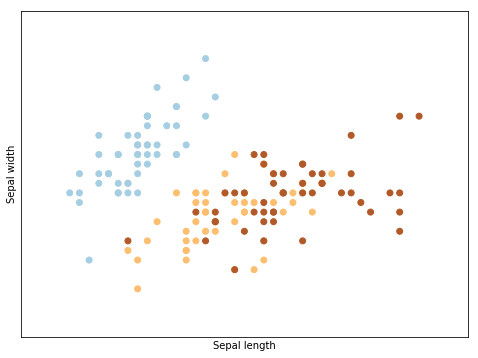

In [13]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [14]:
X = iris.data[:, 2:] # petal length and width
y = iris.target


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

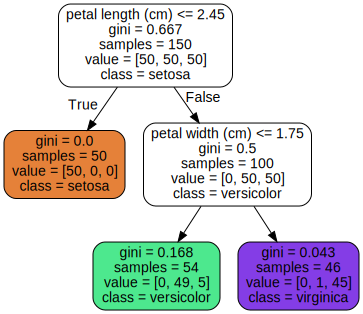

In [16]:
with open("iris_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
# command-line:
# doy -T png iris_tree.dot -o iris_tree.png
# the above line converts the .dot file to a .png image file